In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the PM Steels.
The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden


# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the perlite, bainite, ferrite and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]
$$
In the case of the remaining austenite phase we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]
$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


In [1]:
rho=7800; Cp=600.0; k=37.0; alpha=k/(Cp*rho)
def h(T):
    if (T < (225+273)):
        return 20.0
    elif ( (225+273) < T < (800+273) ):
        return -2.11e-9 * T**4 + 3.78e-6 * T**3 -0.00217*T**2 + 0.555*T-32.47
    else:
        return 92.5
    
    

Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [2]:
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [3]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,300):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


NameError: name 'temp' is not defined

# Calculation of heat transfer

In this section we solve general 2d heat equation using fipy library.

In [2]:
from fipy import *
import numpy as np

Here we define the material properties for the 1080 low carbon stainless steel. The data are taken from the paper (ref).
Data are saved in the text file for reading.

In [23]:
def read_properties():
    # read the text file for different properties
    densityP = np.loadtxt(fname='C:\\Users\\tonii\\OneDrive\\Pictures\\Datathief\\density1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    densityMA = np.loadtxt(fname='C:\\Users\\tonii\\OneDrive\\Pictures\\Datathief\\density1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    conductivityP = np.loadtxt(fname='C:\\Users\\tonii\\OneDrive\\Pictures\\Datathief\\conductivity1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    conductivityM = np.loadtxt(fname='C:\\Users\\tonii\\OneDrive\\Pictures\\Datathief\\conductivity1080Martensite.txt', comments='#', delimiter=',', dtype='double')
    conductivityA = np.loadtxt(fname='C:\\Users\\tonii\\OneDrive\\Pictures\\Datathief\\conductivity1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    
    return (densityP,densityMA,conductivityP,conductivityM, conductivityA)

In [24]:
read_properties()

(array([[6.4090000e-01, 7.8549296e+03],
        [3.9490400e+01, 7.8422535e+03],
        [9.1823100e+01, 7.8295775e+03],
        [1.3063460e+02, 7.8225352e+03],
        [1.7284540e+02, 7.8112676e+03],
        [2.1339930e+02, 7.7957746e+03],
        [2.5392470e+02, 7.7845070e+03],
        [2.9446910e+02, 7.7704224e+03],
        [3.3839370e+02, 7.7549296e+03],
        [3.8229930e+02, 7.7422535e+03],
        [4.2790950e+02, 7.7267606e+03],
        [4.6506410e+02, 7.7154929e+03],
        [5.1065520e+02, 7.7028169e+03],
        [5.5458930e+02, 7.6859155e+03],
        [5.9514320e+02, 7.6704224e+03],
        [8.8159360e+02, 7.6802817e+03],
        [6.2894600e+02, 7.6563380e+03],
        [6.6106350e+02, 7.6422535e+03],
        [6.9485680e+02, 7.6295775e+03],
        [7.3203990e+02, 7.6140845e+03],
        [7.6416680e+02, 7.5985915e+03],
        [7.9797900e+02, 7.5830986e+03]]), array([[  52.062 , 7977.4647],
        [  99.386 , 7957.7465],
        [ 143.358 , 7935.2113],
        [ 187.3113, 791

In [ ]:
Interpolate the experimental data to get interpolating function:

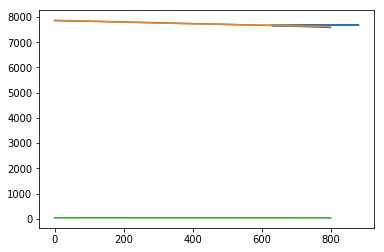

In [50]:
# curve fitting
from scipy.optimize import curve_fit, fsolve, newton
from scipy.interpolate import RectBivariateSpline
# fit the density function to second order polynomial
def density(x,a,b,c):
     return a*x**2 + b*x + c
def conductivity(x,a,b,c):
    return a*x**2 + b*x + c
#density polynomial
densP = [0.]
condM = [0.]
densityP=read_properties()[0]
densP,pcov = curve_fit(density,densityP[:,0],densityP[:,1])
conductivityM = read_properties()[3]
condM,pcov = curve_fit(conductivity,conductivityM[:,0],conductivityM[:,1])
def fP(t_):
    return densP[0]*t_**2+ densP[1]*t_ + densP[2]
def cM(t_):
    return condM[0]*t_**2+ condM[1]*t_ + condM[2]

plt.plot(densityP[:,0],densityP[:,1])
w = np.linspace(0,800,100)
plt.plot(w,fP(w))

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [6]:
steps = 100
N = 40
L = 2.5*N/4000
dL = L / N
dt = 0.1
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

Also adds the fraction of different phases as cell variable, so we can calculate the contributions from different phases to heat equation.

In [7]:
fi = CellVariable(mesh=mesh, name='fractions', hasOld=True, value=0.0)
temperature = CellVariable(mesh = mesh, name='temperature',value=1173., hasOld=True)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 1173K$.
Boundary condition at $y=0$ is given by convection cooling condition:
$$
-k \frac{\partial T}{\partial n} = h_{rc}(T) (T-T_{\infty})
$$

The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

In [8]:
vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
#temperature.constrain(t_inf, mesh.facesRight)
#temperature.constrain(1173., mesh.facesTop)
fluxBottom = vh(temperature.faceValue)*(temperature.faceValue-t_inf)

For now we are assuming that complete austinite is transforming directly in martensite phase. We are using here Koistinen-Marburger law:
$$
F_m = (1-exp(-\alpha(T_{ms}-T))(1-\sum_{i=1}F_i)
$$
where $F_i$ represent the fraction of the different fractions of the perlite, banite and austinite phase. The sumation is not done for martensite phase. 
Alpha is constant taken from the paper 

In [31]:
alpha = 1.10E-2; 
Tm= 850+273;    # martensitic start temperature
def koistinen_marburger(temperature):
    #fi.setValue(1.0-np.exp(-alpha*(Tm-temperature)), where=Tm-temperature > 0)
    fi.setValue(1.0-(np.exp(-alpha*Tm)*(1+alpha*temperature+0.5*(alpha*temperature)**2+1./6*(alpha*temperature)**3)), where=Tm-temperature > 0)

Define the source term for the phase transformation effects. The phase transformation source contains the fraction of the austinite phase transformed in martensite and enthalpy of the formation.

In [10]:
deltaHm = 320E+6;
#deltaHm=0.
#def phaseSourceT():
#    return deltaHm*(fi-fi.old)/dt
def phaseSourceT():
    return TransientTerm(var=fi,coeff=deltaHm)

Now setup the temperature equation for source term comming from the phase transformations defined the flag phaseTrans.

In [11]:
temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature)== DiffusionTerm(coeff=k,var=temperature)+(mesh.facesBottom*fluxBottom).divergence+phaseSourceT()

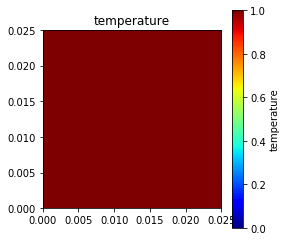

In [12]:
if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

We step the solution in time, plotting as we go interactively

In [13]:
#import fipy.solvers.pyAMG as solvers
import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 3000 # number of steps to calculate
eps =1e-5
Tvstime = [] # temperature values during cooling

for i in range(steps):
    terr=10e+10
    temperature.updateOld()
    fi.updateOld()
    
    #update martensite fraction using koistinen-marburger eq.
    koistinen_marburger(temperature) 
    print max(fi)
    while(terr > eps):
        print "Residual %f" % terr
        terr = temperatureEq.sweep(temperature, dt=dt,solver=poisson)
    
    #print min(phaseSourceT())
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperatureOH"+str(i)+".eps")  
        np.savetxt(path+"temperatureOH"+str(i),temperature)
        np.savetxt(path+"martensiteOH"+str(i),fi)
        Tvstime.append(temperature.value[0])
        print "step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature)
        

0.0
Residual 100000000000.000000
Residual 4.628037
Residual 0.007289
Residual 0.000011
step:  0 Min. temperature 1171.6209570437184 Max. temperature 1172.9999999999961
0.0
Residual 100000000000.000000
Residual 2.660750
Residual 0.004845
step:  1 Min. temperature 1170.704251476177 Max. temperature 1172.999999999936
0.0
Residual 100000000000.000000
Residual 2.149071
Residual 0.003762
step:  2 Min. temperature 1169.9924859682553 Max. temperature 1172.9999999995061
0.0
Residual 100000000000.000000
Residual 1.910941
Residual 0.003161
step:  3 Min. temperature 1169.3944552183953 Max. temperature 1172.9999999973745
0.0
Residual 100000000000.000000
Residual 1.763578
Residual 0.002774
step:  4 Min. temperature 1168.8696903080454 Max. temperature 1172.99999998913
0.0
Residual 100000000000.000000
Residual 1.659282
Residual 0.002499
step:  5 Min. temperature 1168.3968478357015 Max. temperature 1172.9999999626089
0.0
Residual 100000000000.000000
Residual 1.579673
Residual 0.002292
step:  6 Min. tem

Residual 0.000760
step:  55 Min. temperature 1157.466880519959 Max. temperature 1172.885298954697
0.0
Residual 100000000000.000000
Residual 0.880481
Residual 0.000753
step:  56 Min. temperature 1157.3243456099876 Max. temperature 1172.87602356723
0.0
Residual 100000000000.000000
Residual 0.876516
Residual 0.000747
step:  57 Min. temperature 1157.183096091915 Max. temperature 1172.8662884619323
0.0
Residual 100000000000.000000
Residual 0.872649
Residual 0.000740
step:  58 Min. temperature 1157.043098718132 Max. temperature 1172.8560879101062
0.0
Residual 100000000000.000000
Residual 0.868874
Residual 0.000733
step:  59 Min. temperature 1156.9043216441594 Max. temperature 1172.8454166646613
0.0
Residual 100000000000.000000
Residual 0.865190
Residual 0.000727
step:  60 Min. temperature 1156.7667343464673 Max. temperature 1172.8342699477355
0.0
Residual 100000000000.000000
Residual 0.861594
Residual 0.000721
step:  61 Min. temperature 1156.6303075463234 Max. temperature 1172.822643437581
0

step:  110 Min. temperature 1150.964762327296 Max. temperature 1171.659567894615
0.0
Residual 100000000000.000000
Residual 0.755801
Residual 0.000531
step:  111 Min. temperature 1150.8643790454457 Max. temperature 1171.6246552583136
0.0
Residual 100000000000.000000
Residual 0.754673
Residual 0.000528
step:  112 Min. temperature 1150.7644499805597 Max. temperature 1171.589354629626
0.0
Residual 100000000000.000000
Residual 0.753569
Residual 0.000526
step:  113 Min. temperature 1150.6649685431782 Max. temperature 1171.553669947544
0.0
Residual 100000000000.000000
Residual 0.752490
Residual 0.000523
step:  114 Min. temperature 1150.5659282734116 Max. temperature 1171.5176051475403
0.0
Residual 100000000000.000000
Residual 0.751435
Residual 0.000521
step:  115 Min. temperature 1150.4673228370239 Max. temperature 1171.4811641594838
0.0
Residual 100000000000.000000
Residual 0.750404
Residual 0.000519
step:  116 Min. temperature 1150.3691460216812 Max. temperature 1171.4443509056794
0.0
Resid

Residual 0.719982
Residual 0.000438
step:  165 Min. temperature 1145.9793959478236 Max. temperature 1169.2607335711202
0.0
Residual 100000000000.000000
Residual 0.719637
Residual 0.000437
step:  166 Min. temperature 1145.8966733676555 Max. temperature 1169.20982813546
0.0
Residual 100000000000.000000
Residual 0.719299
Residual 0.000436
step:  167 Min. temperature 1145.8141689202553 Max. temperature 1169.158718838297
0.0
Residual 100000000000.000000
Residual 0.718969
Residual 0.000435
step:  168 Min. temperature 1145.7318798801577 Max. temperature 1169.1074082218547
0.0
Residual 100000000000.000000
Residual 0.718645
Residual 0.000434
step:  169 Min. temperature 1145.6498035590835 Max. temperature 1169.0558987998038
0.0
Residual 100000000000.000000
Residual 0.718327
Residual 0.000433
step:  170 Min. temperature 1145.5679373053213 Max. temperature 1169.0041930574678
0.0
Residual 100000000000.000000
Residual 0.718016
Residual 0.000432
step:  171 Min. temperature 1145.4862785031294 Max. tem

step:  219 Min. temperature 1141.7670455219595 Max. temperature 1166.274857075253
0.0
Residual 100000000000.000000
Residual 0.708153
Residual 0.000392
step:  220 Min. temperature 1141.692966258308 Max. temperature 1166.2159449330109
0.0
Residual 100000000000.000000
Residual 0.708024
Residual 0.000391
step:  221 Min. temperature 1141.618999379459 Max. temperature 1166.1569310464567
0.0
Residual 100000000000.000000
Residual 0.707897
Residual 0.000390
step:  222 Min. temperature 1141.545143541209 Max. temperature 1166.0978167452286
0.0
Residual 100000000000.000000
Residual 0.707772
Residual 0.000390
step:  223 Min. temperature 1141.471397416353 Max. temperature 1166.0386033425955
0.0
Residual 100000000000.000000
Residual 0.707649
Residual 0.000389
step:  224 Min. temperature 1141.3977596944585 Max. temperature 1165.9792921356513
0.0
Residual 100000000000.000000
Residual 0.707527
Residual 0.000389
step:  225 Min. temperature 1141.324229081646 Max. temperature 1165.9198844055077
0.0
Residua

step:  274 Min. temperature 1137.8294176984136 Max. temperature 1162.9135181700165
0.0
Residual 100000000000.000000
Residual 0.702911
Residual 0.000367
step:  275 Min. temperature 1137.7599032148937 Max. temperature 1162.85061468501
0.0
Residual 100000000000.000000
Residual 0.702838
Residual 0.000367
step:  276 Min. temperature 1137.690447516895 Max. temperature 1162.7876627257936
0.0
Residual 100000000000.000000
Residual 0.702765
Residual 0.000367
step:  277 Min. temperature 1137.621049933225 Max. temperature 1162.724662961484
0.0
Residual 100000000000.000000
Residual 0.702693
Residual 0.000366
step:  278 Min. temperature 1137.5517098010778 Max. temperature 1162.6616160528592
0.0
Residual 100000000000.000000
Residual 0.702621
Residual 0.000366
step:  279 Min. temperature 1137.4824264659262 Max. temperature 1162.5985226524629
0.0
Residual 100000000000.000000
Residual 0.702550
Residual 0.000366
step:  280 Min. temperature 1137.4131992814225 Max. temperature 1162.5353834047037
0.0
Residu

Residual 0.699358
Residual 0.000355
step:  330 Min. temperature 1134.011248327584 Max. temperature 1159.3321149375195
0.0
Residual 100000000000.000000
Residual 0.699299
Residual 0.000354
step:  331 Min. temperature 1133.944190567762 Max. temperature 1159.2673297728122
0.0
Residual 100000000000.000000
Residual 0.699240
Residual 0.000354
step:  332 Min. temperature 1133.8771644336011 Max. temperature 1159.2025232160017
0.0
Residual 100000000000.000000
Residual 0.699181
Residual 0.000354
step:  333 Min. temperature 1133.810169592846 Max. temperature 1159.137695598299
0.0
Residual 100000000000.000000
Residual 0.699123
Residual 0.000354
step:  334 Min. temperature 1133.743205717382 Max. temperature 1159.0728472467795
0.0
Residual 100000000000.000000
Residual 0.699064
Residual 0.000354
step:  335 Min. temperature 1133.6762724831856 Max. temperature 1159.0079784844334
0.0
Residual 100000000000.000000
Residual 0.699006
Residual 0.000354
step:  336 Min. temperature 1133.6093695702727 Max. tempe

0.0
Residual 100000000000.000000
Residual 0.696241
Residual 0.000347
step:  385 Min. temperature 1130.362568858296 Max. temperature 1155.7446043730272
0.0
Residual 100000000000.000000
Residual 0.696186
Residual 0.000347
step:  386 Min. temperature 1130.296850169549 Max. temperature 1155.679041531599
0.0
Residual 100000000000.000000
Residual 0.696131
Residual 0.000347
step:  387 Min. temperature 1130.2311498214272 Max. temperature 1155.6134705307486
0.0
Residual 100000000000.000000
Residual 0.696076
Residual 0.000347
step:  388 Min. temperature 1130.1654676471992 Max. temperature 1155.5478915363162
0.0
Residual 100000000000.000000
Residual 0.696021
Residual 0.000347
step:  389 Min. temperature 1130.0998034822105 Max. temperature 1155.4823047120692
0.0
Residual 100000000000.000000
Residual 0.695966
Residual 0.000347
step:  390 Min. temperature 1130.0341571638564 Max. temperature 1155.4167102197246
0.0
Residual 100000000000.000000
Residual 0.695911
Residual 0.000347
step:  391 Min. temper

Residual 0.000343
step:  439 Min. temperature 1126.8364517315217 Max. temperature 1152.1960665009963
0.0
Residual 100000000000.000000
Residual 0.693244
Residual 0.000343
step:  440 Min. temperature 1126.7715290659887 Max. temperature 1152.1302561782402
0.0
Residual 100000000000.000000
Residual 0.693190
Residual 0.000343
step:  441 Min. temperature 1126.7066181561668 Max. temperature 1152.064444234569
0.0
Residual 100000000000.000000
Residual 0.693136
Residual 0.000343
step:  442 Min. temperature 1126.6417189172341 Max. temperature 1151.998630753969
0.0
Residual 100000000000.000000
Residual 0.693082
Residual 0.000343
step:  443 Min. temperature 1126.5768312654222 Max. temperature 1151.9328158193746
0.0
Residual 100000000000.000000
Residual 0.693028
Residual 0.000343
step:  444 Min. temperature 1126.511955118004 Max. temperature 1151.8669995126802
0.0
Residual 100000000000.000000
Residual 0.692974
Residual 0.000343
step:  445 Min. temperature 1126.4470903932786 Max. temperature 1151.8011

step:  493 Min. temperature 1123.345641825446 Max. temperature 1148.6417774203644
0.0
Residual 100000000000.000000
Residual 0.690340
Residual 0.000340
step:  494 Min. temperature 1123.2812550347087 Max. temperature 1148.5759773220095
0.0
Residual 100000000000.000000
Residual 0.690286
Residual 0.000340
step:  495 Min. temperature 1123.216876646953 Max. temperature 1148.5101789112048
0.0
Residual 100000000000.000000
Residual 0.690233
Residual 0.000340
step:  496 Min. temperature 1123.1525066189347 Max. temperature 1148.4443822303874
0.0
Residual 100000000000.000000
Residual 0.690179
Residual 0.000340
step:  497 Min. temperature 1123.0881449079434 Max. temperature 1148.3785873214608
0.0
Residual 100000000000.000000
Residual 0.690126
Residual 0.000340
step:  498 Min. temperature 1123.0237914717973 Max. temperature 1148.3127942258002
0.0
Residual 100000000000.000000
Residual 0.690072
Residual 0.000340
step:  499 Min. temperature 1122.959446268837 Max. temperature 1148.2470029842602
0.998256

0.9982569592487262
Residual 100000000000.000000
Residual 0.731675
Residual 0.000594
step:  543 Min. temperature 1124.1501686255185 Max. temperature 1145.454331708408
0.9982569592487262
Residual 100000000000.000000
Residual 0.729365
Residual 0.000585
step:  544 Min. temperature 1124.0394343287971 Max. temperature 1145.3969861998864
0.9982569592487262
Residual 100000000000.000000
Residual 0.727229
Residual 0.000577
step:  545 Min. temperature 1123.930262530884 Max. temperature 1145.3399492904502
0.9982569592487262
Residual 100000000000.000000
Residual 0.725251
Residual 0.000569
step:  546 Min. temperature 1123.8225688014545 Max. temperature 1145.2832092612528
0.9982569592487262
Residual 100000000000.000000
Residual 0.723415
Residual 0.000562
step:  547 Min. temperature 1123.7162749912634 Max. temperature 1145.2267539402299
0.9982569592487262
Residual 100000000000.000000
Residual 0.721709
Residual 0.000555
step:  548 Min. temperature 1123.6113086447174 Max. temperature 1145.1705708045909


Residual 0.890203
Residual 0.001013
step:  593 Min. temperature 1124.9904348561677 Max. temperature 1142.7548382092618
0.9982622585178643
Residual 100000000000.000000
Residual 0.874826
Residual 0.000977
step:  594 Min. temperature 1124.805587457506 Max. temperature 1142.702518280285
0.9982622585178643
Residual 100000000000.000000
Residual 0.861143
Residual 0.000944
step:  595 Min. temperature 1124.6269772258229 Max. temperature 1142.6504077897994
0.9982622585178643
Residual 100000000000.000000
Residual 0.848918
Residual 0.000914
step:  596 Min. temperature 1124.4540573564045 Max. temperature 1142.5985224938647
0.9982622585178643
Residual 100000000000.000000
Residual 0.837953
Residual 0.000886
step:  597 Min. temperature 1124.2863471713056 Max. temperature 1142.5468763659155
0.9982622585178643
Residual 100000000000.000000
Residual 0.828083
Residual 0.000861
step:  598 Min. temperature 1124.1234221448954 Max. temperature 1142.4954814566229
0.9982622585178643
Residual 100000000000.000000


Residual 1.206065
Residual 0.001650
step:  642 Min. temperature 1125.7699346518762 Max. temperature 1140.423062032601
0.9982672965164676
Residual 100000000000.000000
Residual 1.152093
Residual 0.001547
step:  643 Min. temperature 1125.477309743985 Max. temperature 1140.3771367659656
0.9982672965164676
Residual 100000000000.000000
Residual 1.106234
Residual 0.001457
step:  644 Min. temperature 1125.201681649639 Max. temperature 1140.3312126432334
0.9982672965164676
Residual 100000000000.000000
Residual 1.066966
Residual 0.001378
step:  645 Min. temperature 1124.9409457991128 Max. temperature 1140.285305295604
0.9982672965164676
Residual 100000000000.000000
Residual 1.033102
Residual 0.001309
step:  646 Min. temperature 1124.6933422615323 Max. temperature 1140.2394320586186
0.9982672965164676
Residual 100000000000.000000
Residual 1.003703
Residual 0.001247
step:  647 Min. temperature 1124.4573884307547 Max. temperature 1140.1936115158771
0.9982672965164676
Residual 100000000000.000000
Re

step:  691 Min. temperature 1125.4308197311482 Max. temperature 1138.3331439689891
0.9982718147026958
Residual 100000000000.000000
Residual 1.299021
Residual 0.001735
step:  692 Min. temperature 1125.1024765210332 Max. temperature 1138.2925015630235
0.9982718147026958
Residual 100000000000.000000
Residual 1.237439
Residual 0.001643
step:  693 Min. temperature 1124.7916042774975 Max. temperature 1138.251817862885
0.9982718147026958
Residual 100000000000.000000
Residual 1.184893
Residual 0.001558
step:  694 Min. temperature 1124.4969245564027 Max. temperature 1138.2111003560196
0.9982718147026958
Residual 100000000000.000000
Residual 1.139696
Residual 0.001479
step:  695 Min. temperature 1124.217045692017 Max. temperature 1138.170359487333
0.9982718147026958
Residual 100000000000.000000
Residual 1.100556
Residual 0.001408
step:  696 Min. temperature 1123.9506080939461 Max. temperature 1138.1296083910684
0.9982718147026958
Residual 100000000000.000000
Residual 1.066458
Residual 0.001344
s

Residual 1.228074
Residual 0.001336
step:  741 Min. temperature 1123.5747550152962 Max. temperature 1136.4201487953683
0.9982663624067549
Residual 100000000000.000000
Residual 1.175526
Residual 0.001335
step:  742 Min. temperature 1123.3220998791687 Max. temperature 1136.3833981160994
0.9982663624067549
Residual 100000000000.000000
Residual 1.133433
Residual 0.001317
step:  743 Min. temperature 1123.0729050712728 Max. temperature 1136.3465979531832
0.9982663624067549
Residual 100000000000.000000
Residual 1.098092
Residual 0.001289
step:  744 Min. temperature 1122.8290236972211 Max. temperature 1136.3097599719858
0.9982663624067549
Residual 100000000000.000000
Residual 1.067653
Residual 0.001256
step:  745 Min. temperature 1122.59131941184 Max. temperature 1136.272898908374
0.9982663624067549
Residual 100000000000.000000
Residual 1.040726
Residual 0.001221
step:  746 Min. temperature 1122.3603459106891 Max. temperature 1136.2360320660748
0.9982663624067549
Residual 100000000000.000000
R

step:  790 Min. temperature 1121.3146288360872 Max. temperature 1134.7225736454925
0.9982655248149842
Residual 100000000000.000000
Residual 1.016412
Residual 0.001016
step:  791 Min. temperature 1121.1223178626167 Max. temperature 1134.6889748011092
0.9982655248149842
Residual 100000000000.000000
Residual 0.995447
Residual 0.001017
step:  792 Min. temperature 1120.9299903467304 Max. temperature 1134.655399247929
0.9982655838314003
Residual 100000000000.000000
Residual 0.977381
Residual 0.001010
step:  793 Min. temperature 1120.7388625115952 Max. temperature 1134.6218704846244
0.9982663945894185
Residual 100000000000.000000
Residual 0.961426
Residual 0.001000
step:  794 Min. temperature 1120.5497283001134 Max. temperature 1134.5884124240363
0.9982671966402059
Residual 100000000000.000000
Residual 0.947123
Residual 0.000986
step:  795 Min. temperature 1120.3630879289951 Max. temperature 1134.5550485383703
0.9982679878714149
Residual 100000000000.000000
Residual 0.934047
Residual 0.000972

step:  840 Min. temperature 1118.848615919631 Max. temperature 1133.1665984176686
0.998274399265238
Residual 100000000000.000000
Residual 0.901328
Residual 0.000840
step:  841 Min. temperature 1118.6896653540475 Max. temperature 1133.1366487257358
0.9982750712447268
Residual 100000000000.000000
Residual 0.892335
Residual 0.000836
step:  842 Min. temperature 1118.5314582998471 Max. temperature 1133.1068920326907
0.9982757399065851
Residual 100000000000.000000
Residual 0.884326
Residual 0.000831
step:  843 Min. temperature 1118.3742943343111 Max. temperature 1133.0773408818707
0.9982764039876171
Residual 100000000000.000000
Residual 0.876370
Residual 0.000824
step:  844 Min. temperature 1118.2184191290223 Max. temperature 1133.0480038152493
0.9982770624536016
Residual 100000000000.000000
Residual 0.869209
Residual 0.000816
step:  845 Min. temperature 1118.0639983266765 Max. temperature 1133.018885453334
0.9982777146092878
Residual 100000000000.000000
Residual 0.862489
Residual 0.000808
s

step:  890 Min. temperature 1116.4595387974737 Max. temperature 1131.7866050313598
0.99828448082503
Residual 100000000000.000000
Residual 0.835620
Residual 0.000724
step:  891 Min. temperature 1116.3226247048735 Max. temperature 1131.7614821856396
0.9982850573823683
Residual 100000000000.000000
Residual 0.830958
Residual 0.000719
step:  892 Min. temperature 1116.1865423783897 Max. temperature 1131.7365420593953
0.9982856303082239
Residual 100000000000.000000
Residual 0.826516
Residual 0.000714
step:  893 Min. temperature 1116.051366504425 Max. temperature 1131.711764345446
0.9982861992906314
Residual 100000000000.000000
Residual 0.822272
Residual 0.000709
step:  894 Min. temperature 1115.917152624519 Max. temperature 1131.68712741392
0.9982867640984467
Residual 100000000000.000000
Residual 0.818208
Residual 0.000704
step:  895 Min. temperature 1115.7839410380896 Max. temperature 1131.6626087161483
0.9982873245648348
Residual 100000000000.000000
Residual 0.814311
Residual 0.000699
step:

Residual 0.000643
step:  940 Min. temperature 1114.1459204172083 Max. temperature 1130.591869149522
0.9982942062203748
Residual 100000000000.000000
Residual 113.725057
Residual 0.000276
step:  941 Min. temperature 1114.0936099095861 Max. temperature 1145.5152793498398
0.9982944256811419
Residual 100000000000.000000
Residual 82.209311
Residual 0.000326
step:  942 Min. temperature 1114.155214066133 Max. temperature 1135.3380797472494
0.9982941672283042
Residual 100000000000.000000
Residual 18.197981
Residual 0.000867
step:  943 Min. temperature 1114.319319932976 Max. temperature 1131.885706040524
0.9982934786136209
Residual 100000000000.000000
Residual 7.674252
Residual 0.001189
step:  944 Min. temperature 1114.5443644499135 Max. temperature 1130.504604366006
0.9982925339873049
Residual 100000000000.000000
Residual 4.711421
Residual 0.001284
step:  945 Min. temperature 1114.787384251618 Max. temperature 1130.4824154925004
0.9982915135156546
Residual 100000000000.000000
Residual 3.398456


Residual 1.333049
Residual 0.000212
step:  990 Min. temperature 1114.2673458263384 Max. temperature 1129.5614489606526
0.9982936967255319
Residual 100000000000.000000
Residual 1.227235
Residual 0.000101
step:  991 Min. temperature 1114.2864468554744 Max. temperature 1129.540772147045
0.9982936165692917
Residual 100000000000.000000
Residual 1.144347
step:  992 Min. temperature 1114.2870320631882 Max. temperature 1129.5202809584741
0.9982936141134654
Residual 100000000000.000000
Residual 1.078312
Residual 0.000082
step:  993 Min. temperature 1114.2714696395872 Max. temperature 1129.5000383057063
0.9982936794204288
Residual 100000000000.000000
Residual 1.026297
Residual 0.000156
step:  994 Min. temperature 1114.2419432232668 Max. temperature 1129.4800977205753
0.9982938033220077
Residual 100000000000.000000
Residual 0.984934
Residual 0.000220
step:  995 Min. temperature 1114.2004071552035 Max. temperature 1129.4605015102284
0.9982939776094196
Residual 100000000000.000000
Residual 0.951876

Residual 0.000431
step:  1040 Min. temperature 1112.522456876649 Max. temperature 1128.7077566717946
0.9983010083881605
Residual 100000000000.000000
Residual 0.825310
Residual 0.000446
step:  1041 Min. temperature 1112.4380322071404 Max. temperature 1128.6947026318621
0.998301361621309
Residual 100000000000.000000
Residual 0.818531
Residual 0.000460
step:  1042 Min. temperature 1112.3510364452143 Max. temperature 1128.6817428225027
0.9983017255603647
Residual 100000000000.000000
Residual 0.812524
Residual 0.000472
step:  1043 Min. temperature 1112.261813731467 Max. temperature 1128.668820105312
0.9983020987613265
Residual 100000000000.000000
Residual 0.807152
Residual 0.000482
step:  1044 Min. temperature 1112.1706661523947 Max. temperature 1128.6558789509277
0.9983024799567933
Residual 100000000000.000000
Residual 0.802301
Residual 0.000491
step:  1045 Min. temperature 1112.0778591102078 Max. temperature 1128.642866070976
0.9983028680334258
Residual 100000000000.000000
Residual 0.7978

Residual 7.654607
Residual 0.000146
step:  1090 Min. temperature 1110.4076846765283 Max. temperature 1130.325359322076
0.9983098417679529
Residual 100000000000.000000
Residual 4.665132
Residual 0.000013
step:  1091 Min. temperature 1110.4051696501926 Max. temperature 1129.4092067486154
0.9983098522548014
Residual 100000000000.000000
Residual 3.337642
Residual 0.000098
step:  1092 Min. temperature 1110.4237774714961 Max. temperature 1128.8108723638904
0.9983097746651559
Residual 100000000000.000000
Residual 2.608041
Residual 0.000179
step:  1093 Min. temperature 1110.457644194839 Max. temperature 1128.3728938039749
0.9983096334438305
Residual 100000000000.000000
Residual 2.157861
Residual 0.000227
step:  1094 Min. temperature 1110.50059370823 Max. temperature 1128.0882930732785
0.9983094543366646
Residual 100000000000.000000
Residual 1.857805
Residual 0.000246
step:  1095 Min. temperature 1110.5471099954189 Max. temperature 1127.9600966220335
0.9983092603410494
Residual 100000000000.000

Residual 0.999279
Residual 0.000046
step:  1139 Min. temperature 1109.6195372894979 Max. temperature 1127.4636977967407
0.9983131259518327
Residual 100000000000.000000
Residual 0.966991
Residual 0.000079
step:  1140 Min. temperature 1109.6046635677033 Max. temperature 1127.456557836424
0.9983131878889332
Residual 100000000000.000000
Residual 0.939370
Residual 0.000109
step:  1141 Min. temperature 1109.5839706075042 Max. temperature 1127.449993565517
0.9983132740559477
Residual 100000000000.000000
Residual 0.915101
Residual 0.000138
step:  1142 Min. temperature 1109.557778287682 Max. temperature 1127.443893749925
0.9983133831184666
Residual 100000000000.000000
Residual 0.894227
Residual 0.000166
step:  1143 Min. temperature 1109.5264312344018 Max. temperature 1127.4381421757807
0.9983135136386224
Residual 100000000000.000000
Residual 0.876042
Residual 0.000191
step:  1144 Min. temperature 1109.490282694307 Max. temperature 1127.4326214632738
0.9983136641423805
Residual 100000000000.0000

step:  1188 Min. temperature 1108.0111795994958 Max. temperature 1127.0984428109787
0.9983198146341448
Residual 100000000000.000000
Residual 0.773961
Residual 0.000314
step:  1189 Min. temperature 1107.951697855728 Max. temperature 1127.0906085807042
0.9983200616592238
Residual 100000000000.000000
Residual 0.768317
Residual 0.000325
step:  1190 Min. temperature 1107.8902822725936 Max. temperature 1127.0819201066279
0.9983203166898807
Residual 100000000000.000000
Residual 0.763160
Residual 0.000334
step:  1191 Min. temperature 1107.8270844834824 Max. temperature 1127.0723480844872
0.9983205790940971
Residual 100000000000.000000
Residual 113.730106
Residual 0.000340
step:  1192 Min. temperature 1107.7627973056437 Max. temperature 1145.4543330459446
0.9983208459933522
Residual 100000000000.000000
Residual 82.211049
Residual 0.000336
step:  1193 Min. temperature 1107.699189678907 Max. temperature 1135.2820765696188
0.9983211100433206
Residual 100000000000.000000
Residual 18.199485
Residual

step:  1238 Min. temperature 1106.42269907482 Max. temperature 1127.1414812898431
0.9983264031626706
Residual 100000000000.000000
Residual 1.259527
Residual 0.000022
step:  1239 Min. temperature 1106.41845977942 Max. temperature 1127.0451786050228
0.9983264207227285
Residual 100000000000.000000
Residual 1.185554
Residual 0.000018
step:  1240 Min. temperature 1106.4150620631845 Max. temperature 1126.9665755112337
0.9983264347966982
Residual 100000000000.000000
Residual 1.125423
Residual 0.000019
step:  1241 Min. temperature 1106.4115585658603 Max. temperature 1126.9038247964886
0.9983264493087497
Residual 100000000000.000000
Residual 1.075897
Residual 0.000023
step:  1242 Min. temperature 1106.4071666289663 Max. temperature 1126.854578161595
0.9983264675007419
Residual 100000000000.000000
Residual 1.033686
Residual 0.000031
step:  1243 Min. temperature 1106.4012621477868 Max. temperature 1126.8164467423114
0.9983264919576866
Residual 100000000000.000000
Residual 0.997921
Residual 0.0000

step:  1287 Min. temperature 1105.2054294388681 Max. temperature 1126.5677248295203
0.9983314402735615
Residual 100000000000.000000
Residual 0.815554
Residual 0.000151
step:  1288 Min. temperature 1105.1769133170958 Max. temperature 1126.5665496256208
0.9983315581523123
Residual 100000000000.000000
Residual 0.804169
Residual 0.000162
step:  1289 Min. temperature 1105.1461723647142 Max. temperature 1126.5641783265166
0.9983316852217156
Residual 100000000000.000000
Residual 0.793786
Residual 0.000174
step:  1290 Min. temperature 1105.1132635649217 Max. temperature 1126.56037042516
0.998331821244837
Residual 100000000000.000000
Residual 0.784304
Residual 0.000185
step:  1291 Min. temperature 1105.078254046223 Max. temperature 1126.5550904273873
0.9983319659427652
Residual 100000000000.000000
Residual 0.775637
Residual 0.000196
step:  1292 Min. temperature 1105.0412181166316 Max. temperature 1126.5483165187834
0.9983321190068895
Residual 100000000000.000000
Residual 0.767698
Residual 0.000

Residual 0.000227
step:  1336 Min. temperature 1103.68403753719 Max. temperature 1129.3185826569031
0.9983377215385967
Residual 100000000000.000000
Residual 3.340755
Residual 0.000219
step:  1337 Min. temperature 1103.6425104337698 Max. temperature 1128.628168323391
0.9983378927658321
Residual 100000000000.000000
Residual 2.605131
Residual 0.000208
step:  1338 Min. temperature 1103.60311378511 Max. temperature 1128.1919266150644
0.998338055197698
Residual 100000000000.000000
Residual 2.147546
Residual 0.000194
step:  1339 Min. temperature 1103.566437115231 Max. temperature 1127.8156352055394
0.9983382064055526
Residual 100000000000.000000
Residual 1.840662
Residual 0.000178
step:  1340 Min. temperature 1103.532850430803 Max. temperature 1127.5580852389203
0.9983383448661461
Residual 100000000000.000000
Residual 1.623713
Residual 0.000160
step:  1341 Min. temperature 1103.502494255111 Max. temperature 1127.3329704635225
0.9983384700023561
Residual 100000000000.000000
Residual 1.464213
R

Residual 0.924588
Residual 0.000093
step:  1386 Min. temperature 1102.3393704564571 Max. temperature 1126.4538543312979
0.9983432599454993
Residual 100000000000.000000
Residual 0.900647
Residual 0.000093
step:  1387 Min. temperature 1102.3217030387011 Max. temperature 1126.4266085682968
0.9983433326314176
Residual 100000000000.000000
Residual 0.879526
Residual 0.000095
step:  1388 Min. temperature 1102.3036436307407 Max. temperature 1126.404846928914
0.9983434069278199
Residual 100000000000.000000
Residual 0.860331
Residual 0.000099
step:  1389 Min. temperature 1102.284995981758 Max. temperature 1126.3885718863082
0.9983434836418992
Residual 100000000000.000000
Residual 0.843241
Residual 0.000103
step:  1390 Min. temperature 1102.2655942580793 Max. temperature 1126.377899122238
0.9983435634556163
Residual 100000000000.000000
Residual 0.827820
Residual 0.000107
step:  1391 Min. temperature 1102.2453009994174 Max. temperature 1126.372795034196
0.9983436469341186
Residual 100000000000.000

Residual 0.734710
Residual 0.000151
step:  1435 Min. temperature 1101.0717897568738 Max. temperature 1126.2336138839885
0.9983484694983509
Residual 100000000000.000000
Residual 0.728972
Residual 0.000157
step:  1436 Min. temperature 1101.0421615205817 Max. temperature 1126.2050890466387
0.998348591133981
Residual 100000000000.000000
Residual 0.723757
Residual 0.000162
step:  1437 Min. temperature 1101.011463650514 Max. temperature 1126.1745732825377
0.9983487171545395
Residual 100000000000.000000
Residual 113.740539
Residual 0.000168
step:  1438 Min. temperature 1100.979709144077 Max. temperature 1145.497900121853
0.9983488475059994
Residual 100000000000.000000
Residual 82.210472
Residual 0.000173
step:  1439 Min. temperature 1100.9469343704357 Max. temperature 1135.331856459555
0.9983489820383892
Residual 100000000000.000000
Residual 18.197206
Residual 0.000178
step:  1440 Min. temperature 1100.9132218906693 Max. temperature 1131.8908968668136
0.9983491204121574
Residual 100000000000.

Residual 1.454395
Residual 0.000165
step:  1484 Min. temperature 1099.6896102896715 Max. temperature 1127.1615390737304
0.9983541374926369
Residual 100000000000.000000
Residual 1.333637
Residual 0.000160
step:  1485 Min. temperature 1099.6593400867766 Max. temperature 1126.9992622250497
0.9983542614773557
Residual 100000000000.000000
Residual 1.238903
Residual 0.000154
step:  1486 Min. temperature 1099.630182425135 Max. temperature 1126.8772010951175
0.9983543808992537
Residual 100000000000.000000
Residual 1.162355
Residual 0.000148
step:  1487 Min. temperature 1099.6021855751787 Max. temperature 1126.7682841796873
0.998354495561308
Residual 100000000000.000000
Residual 1.099480
Residual 0.000142
step:  1488 Min. temperature 1099.5753459885464 Max. temperature 1126.6766299590636
0.9983546054787171
Residual 100000000000.000000
Residual 1.046868
Residual 0.000136
step:  1489 Min. temperature 1099.5496157021464 Max. temperature 1126.604729848743
0.9983547108485312
Residual 100000000000.00

step:  1533 Min. temperature 1098.4092248862303 Max. temperature 1126.3774654964448
0.9983593763925436
Residual 100000000000.000000
Residual 0.809905
Residual 0.000117
step:  1534 Min. temperature 1098.387033539202 Max. temperature 1126.3603809438805
0.9983594670931611
Residual 100000000000.000000
Residual 0.795756
Residual 0.000117
step:  1535 Min. temperature 1098.3649650835525 Max. temperature 1126.3388051811007
0.9983595572881591
Residual 100000000000.000000
Residual 0.783391
Residual 0.000117
step:  1536 Min. temperature 1098.342918945611 Max. temperature 1126.313069957108
0.9983596473886206
Residual 100000000000.000000
Residual 0.772560
Residual 0.000117
step:  1537 Min. temperature 1098.3208012592688 Max. temperature 1126.2834896180716
0.9983597377781562
Residual 100000000000.000000
Residual 0.763110
Residual 0.000118
step:  1538 Min. temperature 1098.2985256146317 Max. temperature 1126.2503595987569
0.9983598288098501
Residual 100000000000.000000
Residual 0.754655
Residual 0.00

0.9983644439492748
Residual 100000000000.000000
Residual 0.719111
Residual 0.000130
step:  1583 Min. temperature 1097.143418493813 Max. temperature 1125.7568976024238
0.9983645446281046
Residual 100000000000.000000
Residual 0.716217
Residual 0.000133
step:  1584 Min. temperature 1097.1182628237511 Max. temperature 1125.6931569394353
0.9983646472267955
Residual 100000000000.000000
Residual 113.747791
Residual 0.000136
step:  1585 Min. temperature 1097.092611773928 Max. temperature 1145.489154094985
0.9983647518414702
Residual 100000000000.000000
Residual 82.209383
Residual 0.000138
step:  1586 Min. temperature 1097.0664473713052 Max. temperature 1135.3265380640833
0.9983648585451647
Residual 100000000000.000000
Residual 18.192786
Residual 0.000141
step:  1587 Min. temperature 1097.039760028035 Max. temperature 1131.88857288935
0.9983649673767026
Residual 100000000000.000000
Residual 7.646941
Residual 0.000144
step:  1588 Min. temperature 1097.0125531029296 Max. temperature 1130.24702218

step:  1632 Min. temperature 1095.8857626131842 Max. temperature 1127.1001039223622
0.9983696687535866
Residual 100000000000.000000
Residual 1.317106
Residual 0.000146
step:  1633 Min. temperature 1095.8580660107132 Max. temperature 1126.9462417208044
0.9983697814777162
Residual 100000000000.000000
Residual 1.210253
Residual 0.000146
step:  1634 Min. temperature 1095.8305244558699 Max. temperature 1126.8330887460606
0.998369893565621
Residual 100000000000.000000
Residual 1.124271
Residual 0.000144
step:  1635 Min. temperature 1095.8032255474632 Max. temperature 1126.7443773237387
0.9983700046609056
Residual 100000000000.000000
Residual 1.054382
Residual 0.000143
step:  1636 Min. temperature 1095.7762442370365 Max. temperature 1126.6821443810318
0.9983701144587047
Residual 100000000000.000000
Residual 0.997636
Residual 0.000141
step:  1637 Min. temperature 1095.7496402739023 Max. temperature 1126.6437424420255
0.998370222716066
Residual 100000000000.000000
Residual 0.951369
Residual 0.0

step:  1681 Min. temperature 1094.6656901964357 Max. temperature 1126.4591578127995
0.9983746294441295
Residual 100000000000.000000
Residual 0.802422
Residual 0.000127
step:  1682 Min. temperature 1094.6416766443601 Max. temperature 1126.3918274687903
0.9983747269790071
Residual 100000000000.000000
Residual 0.792655
Residual 0.000125
step:  1683 Min. temperature 1094.6179753486947 Max. temperature 1126.3201472026942
0.9983748232417536
Residual 100000000000.000000
Residual 0.784223
Residual 0.000124
step:  1684 Min. temperature 1094.5945548731145 Max. temperature 1126.2447294155377
0.9983749183601915
Residual 100000000000.000000
Residual 0.777227
Residual 0.000122
step:  1685 Min. temperature 1094.5713794471137 Max. temperature 1126.166101073849
0.9983750124797228
Residual 100000000000.000000
Residual 0.771252
Residual 0.000121
step:  1686 Min. temperature 1094.5484102338332 Max. temperature 1126.0847163074657
0.9983751057581778
Residual 100000000000.000000
Residual 0.766095
Residual 0.

step:  1731 Min. temperature 1093.4677628353124 Max. temperature 1125.2575888475872
0.998379490229452
Residual 100000000000.000000
Residual 0.755632
Residual 0.000119
step:  1732 Min. temperature 1093.4452233868583 Max. temperature 1125.1530335494815
0.998379581593305
Residual 100000000000.000000
Residual 0.753242
Residual 0.000120
step:  1733 Min. temperature 1093.422608578855 Max. temperature 1125.0483374248192
0.9983796732591542
Residual 100000000000.000000
Residual 0.750968
Residual 0.000120
step:  1734 Min. temperature 1093.3998906343509 Max. temperature 1124.943585095487
0.9983797653395482
Residual 100000000000.000000
Residual 0.748789
Residual 0.000121
step:  1735 Min. temperature 1093.3770434200396 Max. temperature 1124.8388491706016
0.9983798579403568
Residual 100000000000.000000
Residual 113.734286
Residual 0.000122
step:  1736 Min. temperature 1093.354042527636 Max. temperature 1145.5122874303718
0.998379951160442
Residual 100000000000.000000
Residual 82.209354
Residual 0.00

Residual 0.000124
step:  1780 Min. temperature 1092.3140632460054 Max. temperature 1128.205087028615
0.9983841623220476
Residual 100000000000.000000
Residual 2.043185
Residual 0.000125
step:  1781 Min. temperature 1092.2904192138135 Max. temperature 1127.8837236335696
0.9983842579777163
Residual 100000000000.000000
Residual 1.683208
Residual 0.000126
step:  1782 Min. temperature 1092.2665908757397 Max. temperature 1127.685593707165
0.9983843543751786
Residual 100000000000.000000
Residual 1.435301
Residual 0.000127
step:  1783 Min. temperature 1092.2425908671007 Max. temperature 1127.5646622432926
0.9983844514632318
Residual 100000000000.000000
Residual 1.264082
Residual 0.000128
step:  1784 Min. temperature 1092.2184388227806 Max. temperature 1127.5208931816449
0.9983845491623673
Residual 100000000000.000000
Residual 1.145675
Residual 0.000128
step:  1785 Min. temperature 1092.1941607088659 Max. temperature 1127.4810293529324
0.9983846473674793
Residual 100000000000.000000
Residual 1.0

step:  1829 Min. temperature 1091.1772042863563 Max. temperature 1126.996962392394
0.9983887573641306
Residual 100000000000.000000
Residual 0.924630
Residual 0.000126
step:  1830 Min. temperature 1091.1533162628305 Max. temperature 1126.8402104188756
0.99838885382235
Residual 100000000000.000000
Residual 0.912315
Residual 0.000126
step:  1831 Min. temperature 1091.129483825358 Max. temperature 1126.6821723798516
0.9983889500522546
Residual 100000000000.000000
Residual 0.901537
Residual 0.000126
step:  1832 Min. temperature 1091.1057315261805 Max. temperature 1126.5236769043295
0.9983890459547411
Residual 100000000000.000000
Residual 0.891895
Residual 0.000125
step:  1833 Min. temperature 1091.0820806964473 Max. temperature 1126.3653344421625
0.9983891414437267
Residual 100000000000.000000
Residual 0.883290
Residual 0.000124
step:  1834 Min. temperature 1091.058549025579 Max. temperature 1126.2075933451852
0.9983892364478445
Residual 100000000000.000000
Residual 0.875037
Residual 0.0001

Residual 0.000117
step:  1879 Min. temperature 1090.043482937772 Max. temperature 1124.91091003396
0.9983933309825767
Residual 100000000000.000000
Residual 0.857983
Residual 0.000116
step:  1880 Min. temperature 1090.0214922424855 Max. temperature 1124.7500737175446
0.9983934196104082
Residual 100000000000.000000
Residual 0.851491
Residual 0.000116
step:  1881 Min. temperature 1089.9996185378639 Max. temperature 1124.5917337554465
0.9983935077634839
Residual 100000000000.000000
Residual 0.845393
Residual 0.000115
step:  1882 Min. temperature 1089.9778535816586 Max. temperature 1124.4357950452106
0.998393595475071
Residual 100000000000.000000
Residual 0.839462
Residual 0.000115
step:  1883 Min. temperature 1089.9561875203635 Max. temperature 1124.2821665006736
0.9983936827849248
Residual 100000000000.000000
Residual 0.833894
Residual 0.000114
step:  1884 Min. temperature 1089.934609130332 Max. temperature 1124.1307600791429
0.9983937697383155
Residual 100000000000.000000
Residual 0.8285

step:  1928 Min. temperature 1088.9909810751913 Max. temperature 1131.712294639351
0.9983975691415424
Residual 100000000000.000000
Residual 3.593403
Residual 0.000108
step:  1929 Min. temperature 1088.9705374267182 Max. temperature 1131.4153787898397
0.9983976513885742
Residual 100000000000.000000
Residual 2.473363
Residual 0.000108
step:  1930 Min. temperature 1088.9500792941785 Max. temperature 1131.072504391082
0.9983977336910407
Residual 100000000000.000000
Residual 2.025838
Residual 0.000108
step:  1931 Min. temperature 1088.929593701419 Max. temperature 1130.6691738224351
0.9983978161011359
Residual 100000000000.000000
Residual 1.800659
Residual 0.000108
step:  1932 Min. temperature 1088.90906864837 Max. temperature 1130.2527449618312
0.99839789866712
Residual 100000000000.000000
Residual 1.656225
Residual 0.000109
step:  1933 Min. temperature 1088.888493595082 Max. temperature 1129.843702021102
0.9983979814313737
Residual 100000000000.000000
Residual 1.548290
Residual 0.000109
s

step:  1977 Min. temperature 1087.9940344961983 Max. temperature 1127.3812620903084
0.9984015766676345
Residual 100000000000.000000
Residual 1.229608
Residual 0.000106
step:  1978 Min. temperature 1087.9739369742117 Max. temperature 1127.0687764284792
0.9984016573864131
Residual 100000000000.000000
Residual 1.188810
Residual 0.000106
step:  1979 Min. temperature 1087.9537993428353 Max. temperature 1126.7719238396032
0.9984017382635411
Residual 100000000000.000000
Residual 1.153125
Residual 0.000107
step:  1980 Min. temperature 1087.9336323518025 Max. temperature 1126.4889242955521
0.9984018192558312
Residual 100000000000.000000
Residual 1.121737
Residual 0.000107
step:  1981 Min. temperature 1087.9134481212332 Max. temperature 1126.2182743439091
0.9984019003145984
Residual 100000000000.000000
Residual 1.093766
Residual 0.000107
step:  1982 Min. temperature 1087.8932596849447 Max. temperature 1125.9586963175532
0.9984019813874954
Residual 100000000000.000000
Residual 1.068856
Residual 0

Residual 0.000097
step:  2027 Min. temperature 1087.0310604600938 Max. temperature 1123.6205057185114
0.9984054412387892
Residual 100000000000.000000
Residual 0.937836
Residual 0.000097
step:  2028 Min. temperature 1087.012776206188 Max. temperature 1123.4264772142044
0.998405514555738
Residual 100000000000.000000
Residual 0.927123
Residual 0.000096
step:  2029 Min. temperature 1086.9945927875006 Max. temperature 1123.2369372980695
0.9984055874661097
Residual 100000000000.000000
Residual 0.917018
Residual 0.000096
step:  2030 Min. temperature 1086.9765087543544 Max. temperature 1123.0516005993554
0.9984056599757541
Residual 100000000000.000000
Residual 0.907549
Residual 0.000095
step:  2031 Min. temperature 1086.9585210256516 Max. temperature 1122.8702201609244
0.9984057320970612
Residual 100000000000.000000
Residual 113.601593
Residual 0.000095
step:  2032 Min. temperature 1086.9406249737658 Max. temperature 1156.6857879657807
0.9984058038486195
Residual 100000000000.000000
Residual 6

step:  2076 Min. temperature 1086.18375659951 Max. temperature 1120.903256865365
0.9984088364159982
Residual 100000000000.000000
Residual 0.841237
Residual 0.000086
step:  2077 Min. temperature 1086.1675075969831 Max. temperature 1120.7506266709686
0.9984089014788778
Residual 100000000000.000000
Residual 0.835985
Residual 0.000086
step:  2078 Min. temperature 1086.1512289271795 Max. temperature 1120.6001609526209
0.9984089666587582
Residual 100000000000.000000
Residual 0.830953
Residual 0.000086
step:  2079 Min. temperature 1086.134906699533 Max. temperature 1120.45176620064
0.9984090320112451
Residual 100000000000.000000
Residual 0.826126
Residual 0.000087
step:  2080 Min. temperature 1086.118526939164 Max. temperature 1120.3053551326882
0.9984090975922757
Residual 100000000000.000000
Residual 0.821492
Residual 0.000087
step:  2081 Min. temperature 1086.1020756691312 Max. temperature 1120.1608461487244
0.9984091634577892
Residual 100000000000.000000
Residual 0.817037
Residual 0.000087

step:  2125 Min. temperature 1085.1539710656652 Max. temperature 1114.9853616560458
0.9984129562676255
Residual 100000000000.000000
Residual 0.711477
Residual 0.000151
step:  2126 Min. temperature 1085.12542918206 Max. temperature 1114.8853549959608
0.9984130703527387
Residual 100000000000.000000
Residual 0.710200
Residual 0.000153
step:  2127 Min. temperature 1085.0965515042783 Max. temperature 1114.7858835198729
0.9984131857744569
Residual 100000000000.000000
Residual 0.708952
Residual 0.000154
step:  2128 Min. temperature 1085.067339084607 Max. temperature 1114.6869371333612
0.998413302528378
Residual 100000000000.000000
Residual 0.707733
Residual 0.000156
step:  2129 Min. temperature 1085.0377931067767 Max. temperature 1114.5885060411774
0.9984134206095732
Residual 100000000000.000000
Residual 0.706542
Residual 0.000158
step:  2130 Min. temperature 1085.0079148781904 Max. temperature 1114.4905807344905
0.9984135400126183
Residual 100000000000.000000
Residual 0.705378
Residual 0.000

step:  2174 Min. temperature 1083.3966620667493 Max. temperature 1110.5742885057039
0.9984199701700245
Residual 100000000000.000000
Residual 0.673362
Residual 0.000225
step:  2175 Min. temperature 1083.354168226906 Max. temperature 1110.4923219081943
0.9984201395164611
Residual 100000000000.000000
Residual 0.672937
Residual 0.000226
step:  2176 Min. temperature 1083.3114532275124 Max. temperature 1110.4106033571406
0.9984203097319846
Residual 100000000000.000000
Residual 0.672522
Residual 0.000227
step:  2177 Min. temperature 1083.2685195809295 Max. temperature 1110.3291295122635
0.9984204808063933
Residual 100000000000.000000
Residual 0.672116
Residual 0.000228
step:  2178 Min. temperature 1083.225369782657 Max. temperature 1110.2478970895788
0.9984206527295555
Residual 100000000000.000000
Residual 0.671718
Residual 0.000229
step:  2179 Min. temperature 1083.1820063108582 Max. temperature 1110.1669028599945
0.99842082549141
Residual 100000000000.000000
Residual 0.671328
Residual 0.000

Residual 0.000268
step:  2224 Min. temperature 1081.045852526181 Max. temperature 1106.7249725015695
0.99842932032151
Residual 100000000000.000000
Residual 0.659952
Residual 0.000269
step:  2225 Min. temperature 1080.994995373711 Max. temperature 1106.6521776041545
0.9984295221901502
Residual 100000000000.000000
Residual 0.659792
Residual 0.000269
step:  2226 Min. temperature 1080.9440184590128 Max. temperature 1106.5795134892262
0.998429724516689
Residual 100000000000.000000
Residual 0.659636
Residual 0.000270
step:  2227 Min. temperature 1080.892923307801 Max. temperature 1106.5069785588905
0.9984299272949487
Residual 100000000000.000000
Residual 0.659482
Residual 0.000271
step:  2228 Min. temperature 1080.8417114280253 Max. temperature 1106.4345712364523
0.9984301305188246
Residual 100000000000.000000
Residual 0.659330
Residual 0.000271
step:  2229 Min. temperature 1080.7903843100294 Max. temperature 1106.362289966091
0.9984303341822832
Residual 100000000000.000000
Residual 0.659181

Residual 0.000292
step:  2273 Min. temperature 1078.4376670246118 Max. temperature 1103.2863362576509
0.998439650621574
Residual 100000000000.000000
Residual 0.654359
Residual 0.000292
step:  2274 Min. temperature 1078.382442737835 Max. temperature 1103.2184030367528
0.9984398688552065
Residual 100000000000.000000
Residual 0.654277
Residual 0.000292
step:  2275 Min. temperature 1078.3271555155911 Max. temperature 1103.150542388417
0.9984400873170215
Residual 100000000000.000000
Residual 0.654195
Residual 0.000293
step:  2276 Min. temperature 1078.2718061987487 Max. temperature 1103.0827534649034
0.9984403060036274
Residual 100000000000.000000
Residual 0.654114
Residual 0.000293
step:  2277 Min. temperature 1078.2163956177965 Max. temperature 1103.015035429159
0.9984405249116755
Residual 100000000000.000000
Residual 0.654034
Residual 0.000293
step:  2278 Min. temperature 1078.1609245929717 Max. temperature 1102.9473874546788
0.998440744037858
Residual 100000000000.000000
Residual 0.6539

step:  2322 Min. temperature 1075.6711771274581 Max. temperature 1100.0293596212446
0.9984505579740283
Residual 100000000000.000000
Residual 0.650971
Residual 0.000304
step:  2323 Min. temperature 1075.613690561847 Max. temperature 1099.9641563470236
0.9984507840800115
Residual 100000000000.000000
Residual 0.650911
Residual 0.000304
step:  2324 Min. temperature 1075.5561720827043 Max. temperature 1099.8989944790942
0.9984510102893491
Residual 100000000000.000000
Residual 0.650852
Residual 0.000304
step:  2325 Min. temperature 1075.4986221459178 Max. temperature 1099.833873560493
0.9984512366002124
Residual 100000000000.000000
Residual 0.650792
Residual 0.000304
step:  2326 Min. temperature 1075.4410412016957 Max. temperature 1099.768793139964
0.998451463010796
Residual 100000000000.000000
Residual 0.650733
Residual 0.000305
step:  2327 Min. temperature 1075.3834296946354 Max. temperature 1099.7037527718855
0.9984516895193173
Residual 100000000000.000000
Residual 0.650674
Residual 0.000

step:  2371 Min. temperature 1072.8241237805385 Max. temperature 1096.8757580932966
0.9984617294008303
Residual 100000000000.000000
Residual 0.648238
Residual 0.000310
step:  2372 Min. temperature 1072.7655183203058 Max. temperature 1096.8121378757107
0.9984619587904466
Residual 100000000000.000000
Residual 0.648185
Residual 0.000310
step:  2373 Min. temperature 1072.7068977370197 Max. temperature 1096.748542236284
0.9984621882162839
Residual 100000000000.000000
Residual 0.648132
Residual 0.000310
step:  2374 Min. temperature 1072.6482622771011 Max. temperature 1096.6849709279534
0.998462417677361
Residual 100000000000.000000
Residual 0.648080
Residual 0.000310
step:  2375 Min. temperature 1072.5896121838923 Max. temperature 1096.6214237067338
0.9984626471727096
Residual 100000000000.000000
Residual 0.648027
Residual 0.000310
step:  2376 Min. temperature 1072.5309476976977 Max. temperature 1096.5579003316807
0.9984628767013733
Residual 100000000000.000000
Residual 0.647974
Residual 0.0

step:  2420 Min. temperature 1069.9386264580673 Max. temperature 1093.7833046187036
0.9984729963761957
Residual 100000000000.000000
Residual 0.645704
Residual 0.000312
step:  2421 Min. temperature 1069.8795203516736 Max. temperature 1093.7206475940714
0.9984732265863846
Residual 100000000000.000000
Residual 0.645654
Residual 0.000312
step:  2422 Min. temperature 1069.8204081935264 Max. temperature 1093.658006044769
0.9984734567968406
Residual 100000000000.000000
Residual 0.645603
Residual 0.000312
step:  2423 Min. temperature 1069.761290116686 Max. temperature 1093.5953798370806
0.9984736870070398
Residual 100000000000.000000
Residual 0.645552
Residual 0.000312
step:  2424 Min. temperature 1069.702166252549 Max. temperature 1093.532768838953
0.9984739172164645
Residual 100000000000.000000
Residual 0.645501
Residual 0.000313
step:  2425 Min. temperature 1069.6430367308678 Max. temperature 1093.470172919976
0.9984741474246042
Residual 100000000000.000000
Residual 0.645451
Residual 0.0003

Residual 0.643236
Residual 0.000313
step:  2470 Min. temperature 1066.978172621757 Max. temperature 1090.667132774688
0.9984844983187167
Residual 100000000000.000000
Residual 0.643186
Residual 0.000313
step:  2471 Min. temperature 1066.9188985873452 Max. temperature 1090.605114040546
0.9984847280140459
Residual 100000000000.000000
Residual 0.643136
Residual 0.000313
step:  2472 Min. temperature 1066.859623468998 Max. temperature 1090.5431057803441
0.9984849576902018
Residual 100000000000.000000
Residual 0.643086
Residual 0.000313
step:  2473 Min. temperature 1066.8003473375854 Max. temperature 1090.4811079225287
0.9984851873469102
Residual 100000000000.000000
Residual 0.643036
Residual 0.000313
step:  2474 Min. temperature 1066.7410702630866 Max. temperature 1090.4191203964333
0.9984854169838997
Residual 100000000000.000000
Residual 0.642986
Residual 0.000313
step:  2475 Min. temperature 1066.6817923146048 Max. temperature 1090.3571431322687
0.9984856466009029
Residual 100000000000.000

step:  2519 Min. temperature 1064.0736070065188 Max. temperature 1087.6393826673084
0.9984957264572983
Residual 100000000000.000000
Residual 0.640743
Residual 0.000313
step:  2520 Min. temperature 1064.0143489386153 Max. temperature 1087.5778072639305
0.9984959549471504
Residual 100000000000.000000
Residual 0.640693
Residual 0.000313
step:  2521 Min. temperature 1063.9550923924087 Max. temperature 1087.5162396948526
0.9984961834078342
Residual 100000000000.000000
Residual 0.640644
Residual 0.000313
step:  2522 Min. temperature 1063.895837406046 Max. temperature 1087.4546799212255
0.9984964118392058
Residual 100000000000.000000
Residual 0.640594
Residual 0.000313
step:  2523 Min. temperature 1063.836584017195 Max. temperature 1087.3931279046797
0.9984966402411231
Residual 100000000000.000000
Residual 0.640544
Residual 0.000313
step:  2524 Min. temperature 1063.7773322630494 Max. temperature 1087.3315836073207
0.9984968686134457
Residual 100000000000.000000
Residual 0.640495
Residual 0.0

step:  2568 Min. temperature 1061.1723627229505 Max. temperature 1084.6307765458994
0.9985068858670125
Residual 100000000000.000000
Residual 0.638314
Residual 0.000313
step:  2569 Min. temperature 1061.1132163701775 Max. temperature 1084.5695470428996
0.9985071127888459
Residual 100000000000.000000
Residual 0.638265
Residual 0.000313
step:  2570 Min. temperature 1061.054072939701 Max. temperature 1084.5083239390228
0.9985073396763137
Residual 100000000000.000000
Residual 0.638215
Residual 0.000313
step:  2571 Min. temperature 1060.994932451981 Max. temperature 1084.4471072131003
0.9985075665293419
Residual 100000000000.000000
Residual 0.638166
Residual 0.000313
step:  2572 Min. temperature 1060.9357949272176 Max. temperature 1084.3858968442223
0.998507793347858
Residual 100000000000.000000
Residual 0.638116
Residual 0.000313
step:  2573 Min. temperature 1060.8766603853544 Max. temperature 1084.324692811736
0.9985080201317901
Residual 100000000000.000000
Residual 0.638067
Residual 0.000

step:  2617 Min. temperature 1058.2779556527576 Max. temperature 1081.6377155923897
0.9985179634573087
Residual 100000000000.000000
Residual 0.635896
Residual 0.000312
step:  2618 Min. temperature 1058.2189723856402 Max. temperature 1081.5767789180563
0.9985181886248434
Residual 100000000000.000000
Residual 0.635847
Residual 0.000312
step:  2619 Min. temperature 1058.159992790021 Max. temperature 1081.515847858818
0.9985184137553942
Residual 100000000000.000000
Residual 0.635797
Residual 0.000312
step:  2620 Min. temperature 1058.1010168768003 Max. temperature 1081.4549224030643
0.998518638848925
Residual 100000000000.000000
Residual 0.635748
Residual 0.000312
step:  2621 Min. temperature 1058.0420446567343 Max. temperature 1081.3940025393247
0.9985188639054001
Residual 100000000000.000000
Residual 0.635699
Residual 0.000312
step:  2622 Min. temperature 1057.9830761404435 Max. temperature 1081.333088256268
0.9985190889247846
Residual 100000000000.000000
Residual 0.635650
Residual 0.000

Residual 0.000311
step:  2667 Min. temperature 1055.3334745614382 Max. temperature 1078.597561730458
0.998529175934299
Residual 100000000000.000000
Residual 0.633438
Residual 0.000311
step:  2668 Min. temperature 1055.2746858302346 Max. temperature 1078.5368939774653
0.9985293992177654
Residual 100000000000.000000
Residual 0.633389
Residual 0.000311
step:  2669 Min. temperature 1055.215901173354 Max. temperature 1078.4762314011314
0.9985296224629991
Residual 100000000000.000000
Residual 0.633340
Residual 0.000311
step:  2670 Min. temperature 1055.1571205964513 Max. temperature 1078.4155739950893
0.9985298456699847
Residual 100000000000.000000
Residual 0.633291
Residual 0.000311
step:  2671 Min. temperature 1055.0983441051053 Max. temperature 1078.3549217530472
0.9985300688387069
Residual 100000000000.000000
Residual 0.633242
Residual 0.000311
step:  2672 Min. temperature 1055.0395717048218 Max. temperature 1078.2942746687872
0.9985302919691504
Residual 100000000000.000000
Residual 0.63

Residual 0.000310
step:  2716 Min. temperature 1052.4577080749143 Max. temperature 1075.6308265264772
0.9985400716311854
Residual 100000000000.000000
Residual 0.631039
Residual 0.000310
step:  2717 Min. temperature 1052.3991244328442 Max. temperature 1075.5704061451497
0.9985402930276247
Residual 100000000000.000000
Residual 0.630990
Residual 0.000310
step:  2718 Min. temperature 1052.3405450690816 Max. temperature 1075.5099907016179
0.998540514385353
Residual 100000000000.000000
Residual 0.630941
Residual 0.000310
step:  2719 Min. temperature 1052.281969986523 Max. temperature 1075.449580192274
0.9985407357043653
Residual 100000000000.000000
Residual 0.630892
Residual 0.000310
step:  2720 Min. temperature 1052.2233991880244 Max. temperature 1075.3891746135514
0.998540956984657
Residual 100000000000.000000
Residual 0.630843
Residual 0.000310
step:  2721 Min. temperature 1052.1648326764002 Max. temperature 1075.3287739619234
0.9985411782262233
Residual 100000000000.000000
Residual 0.630

Residual 0.628648
Residual 0.000309
step:  2766 Min. temperature 1049.5338153176801 Max. temperature 1072.6157939089815
0.9985510939692112
Residual 100000000000.000000
Residual 0.628600
Residual 0.000308
step:  2767 Min. temperature 1049.4754484495068 Max. temperature 1072.5556166884014
0.9985513134268138
Residual 100000000000.000000
Residual 0.628551
Residual 0.000308
step:  2768 Min. temperature 1049.4170859634628 Max. temperature 1072.4954442662795
0.9985515328456209
Residual 100000000000.000000
Residual 0.628502
Residual 0.000308
step:  2769 Min. temperature 1049.358727860932 Max. temperature 1072.4352766405227
0.9985517522256333
Residual 100000000000.000000
Residual 0.628454
Residual 0.000308
step:  2770 Min. temperature 1049.3003741432765 Max. temperature 1072.37511380906
0.9985519715668522
Residual 100000000000.000000
Residual 0.628405
Residual 0.000308
step:  2771 Min. temperature 1049.2420248118376 Max. temperature 1072.314955769841
0.9985521908692785
Residual 100000000000.000

Residual 0.000307
step:  2815 Min. temperature 1046.6790135499898 Max. temperature 1069.6727186396809
0.9985618018015577
Residual 100000000000.000000
Residual 0.626219
Residual 0.000307
step:  2816 Min. temperature 1046.6208626867924 Max. temperature 1069.6127744295727
0.9985620193606315
Residual 100000000000.000000
Residual 0.626170
Residual 0.000307
step:  2817 Min. temperature 1046.5627162524581 Max. temperature 1069.5528349364845
0.9985622368810371
Residual 100000000000.000000
Residual 0.626122
Residual 0.000307
step:  2818 Min. temperature 1046.504574247576 Max. temperature 1069.4929001591206
0.9985624543627785
Residual 100000000000.000000
Residual 0.626073
Residual 0.000307
step:  2819 Min. temperature 1046.4464366727232 Max. temperature 1069.4329700961966
0.9985626718058596
Residual 100000000000.000000
Residual 0.626025
Residual 0.000307
step:  2820 Min. temperature 1046.3883035284646 Max. temperature 1069.3730447464404
0.9985628892102846
Residual 100000000000.000000
Residual 0.

Residual 0.623847
Residual 0.000306
step:  2865 Min. temperature 1043.776904881174 Max. temperature 1066.6812635020692
0.9985726324735936
Residual 100000000000.000000
Residual 0.623798
Residual 0.000306
step:  2866 Min. temperature 1043.7189759836892 Max. temperature 1066.6215537551586
0.998572848104867
Residual 100000000000.000000
Residual 0.623750
Residual 0.000306
step:  2867 Min. temperature 1043.6610515326952 Max. temperature 1066.5618486723454
0.9985730636977149
Residual 100000000000.000000
Residual 0.623702
Residual 0.000306
step:  2868 Min. temperature 1043.603131528345 Max. temperature 1066.5021482527713
0.9985732792521427
Residual 100000000000.000000
Residual 0.623653
Residual 0.000306
step:  2869 Min. temperature 1043.5452159707863 Max. temperature 1066.4424524955848
0.9985734947681562
Residual 100000000000.000000
Residual 0.623605
Residual 0.000306
step:  2870 Min. temperature 1043.487304860159 Max. temperature 1066.3827613999406
0.9985737102457608
Residual 100000000000.000

step:  2914 Min. temperature 1040.9436196182037 Max. temperature 1063.7609562695998
0.9985831533246218
Residual 100000000000.000000
Residual 0.621436
Residual 0.000305
step:  2915 Min. temperature 1040.885908679166 Max. temperature 1063.701474155338
0.9985833670799651
Residual 100000000000.000000
Residual 0.621387
Residual 0.000305
step:  2916 Min. temperature 1040.8282021880648 Max. temperature 1063.6419966692606
0.9985835807971779
Residual 100000000000.000000
Residual 0.621339
Residual 0.000305
step:  2917 Min. temperature 1040.7705001448246 Max. temperature 1063.5825238107413
0.9985837944762668
Residual 100000000000.000000
Residual 0.621291
Residual 0.000305
step:  2918 Min. temperature 1040.7128025493664 Max. temperature 1063.523055579157
0.998584008117238
Residual 100000000000.000000
Residual 0.621243
Residual 0.000305
step:  2919 Min. temperature 1040.6551094016083 Max. temperature 1063.4635919738873
0.9985842217200981
Residual 100000000000.000000
Residual 0.621195
Residual 0.000

step:  2963 Min. temperature 1038.1210123536569 Max. temperature 1060.8517645162192
0.9985935826149684
Residual 100000000000.000000
Residual 0.619082
Residual 0.000304
step:  2964 Min. temperature 1038.0635192211687 Max. temperature 1060.7925085006225
0.9985937945096167
Residual 100000000000.000000
Residual 0.619034
Residual 0.000304
step:  2965 Min. temperature 1038.006030529662 Max. temperature 1060.7332570858234
0.9985940063664586
Residual 100000000000.000000
Residual 0.618986
Residual 0.000304
step:  2966 Min. temperature 1037.9485462789385 Max. temperature 1060.6740102713213
0.9985942181855006
Residual 100000000000.000000
Residual 0.618938
Residual 0.000304
step:  2967 Min. temperature 1037.891066468798 Max. temperature 1060.6147680566166
0.9985944299667499
Residual 100000000000.000000
Residual 0.618890
Residual 0.000304
step:  2968 Min. temperature 1037.8335910990386 Max. temperature 1060.5555304412119
0.9985946417102131
Residual 100000000000.000000
Residual 0.618842
Residual 0.0

<Figure size 432x288 with 0 Axes>

In [29]:
tempload = np.loadtxt(path+"martensiteOH1800")

<a list of 7 text.Text objects>

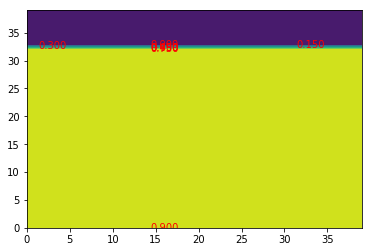

In [30]:
m = tempload.reshape(N,N)
cm = plt.contourf(m)
plt.clabel(cm,colors='r')

In [16]:
%matplotlib inline
temperatureViewer.plot(path + "temperature599.png")

<Figure size 432x288 with 0 Axes>

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

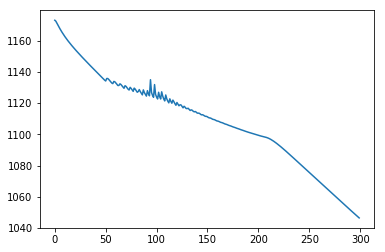

In [36]:
t=[]
for i in range(1,3000,10):
    load = np.loadtxt(path+"temperatureOH"+str(i))
    t.append(load.reshape(N,N)[10,0])
plt.plot(t)   

Plot of the temperature at central point of the cylinder. The temperature rises on the point and then drops again due to enthalphy of austinite to martensite phase transformation. Is this numerical instability??

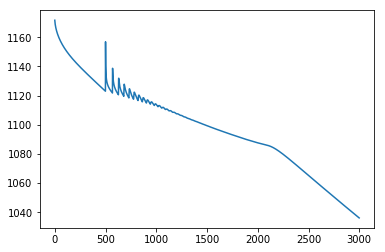

In [18]:
plta = plt.plot(Tvstime)

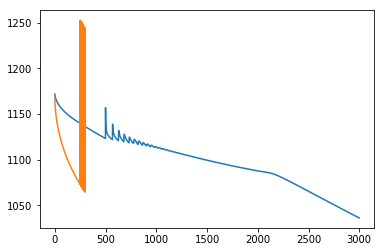

In [19]:
plt.plot(Tvstime)
plt.plot(temp)
plt.show()